In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

kn = KNeighborsClassifier()
df = pd.read_csv('data/Fish.csv')

In [192]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [193]:
fish_target = df.loc[cond, ['Species']]
train_input, test_input, train_target, test_target = tts(fish_data, fish_target)
# input 먼저                   target 나중

In [157]:
test_target.head(3)

,Species
12,Bream
3,Bream
9,Bream


In [158]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [159]:
kn.score(test_input, test_target['Species'])

1.0

In [43]:
kn.predict([[25,150]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

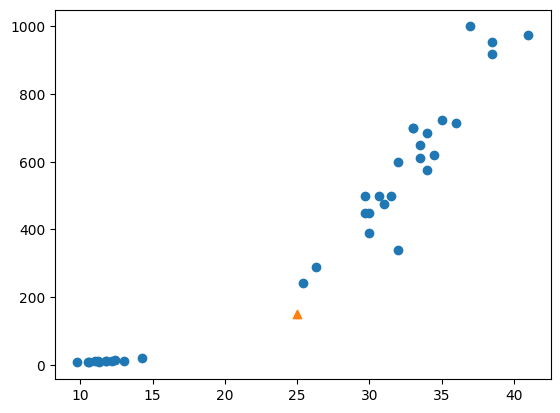

In [44]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight']) # 전체 출력
plt.scatter(25, 150, marker='^')

In [45]:
kn.kneighbors([[25, 150]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[ 4, 26, 35,  7, 12]]))

In [76]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std) # 표준편차

Length2     25.825000
Weight     408.133333
dtype: float64
Length2     10.613829
Weight     332.057132
dtype: float64


In [69]:
# 표준편차로 나눠달라고 하면...
train_scaled = (train_input - mean) / std # 표준편차 구하는 공식 그대로 따라한 것임을 참고

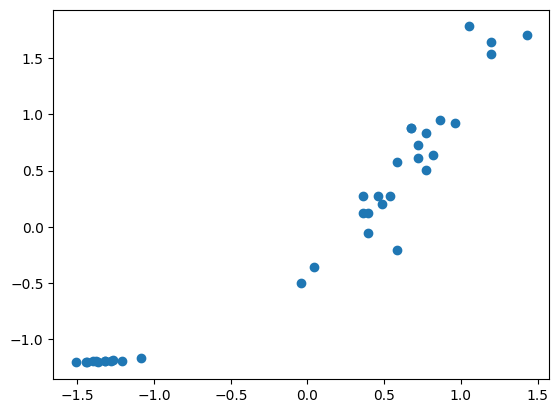

In [70]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])
# 산점도를 눈으로 보는 사람 입장에서 간격이 동일해진다 = 표준점수화 시켰다

In [71]:
kn.fit(train_scaled, train_target['Species']) # 여기도 표준점수화 시켰다

KNeighborsClassifier()

In [72]:
test_scaled = (test_input - mean) / std # 테스트도 표준점수화 시킨다

In [73]:
kn.score(test_scaled, test_target['Species'])

1.0

C:\Users\1-04\AppData\Local\Temp\ipykernel_3328\1968249445.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter([new[0]], [new[1]], marker='^')


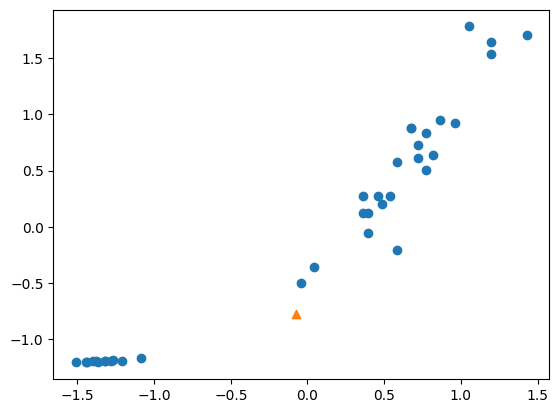

In [90]:
# plt.scatter(25, 150, marker='^') 이것도 표준점수화 시켜줘야 한다
new = ([25, 150] - mean) / std
plt.scatter(train_scaled['Length2'], train_scaled['Weight']) # 전체 출력
plt.scatter([new[0]], [new[1]], marker='^')

In [91]:
kn.predict([new])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

# Penguins (연습문제)
- Adelie, Gentoo 구분하기

In [194]:
import seaborn as sns

df = sns.load_dataset('penguins').dropna()
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


펭귄 몸무게와의 상관관계 중 날개 길이가 일단 제일 상관관계 있어보이는데 이건 당연한거같고.. 글머 종 별로 나누는 기준이 되기에 신뢰도가 충분한지를 일단 진행해보면서 확인하자

In [162]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [163]:
cond = df['species'].isin(['Adelie', 'Gentoo']).dropna(how='all')
peng_data = df.loc[cond, ['body_mass_g', 'flipper_length_mm']]
peng_target = df.loc[cond, ['species']]

In [164]:
x_input, y_input, x_target, y_target = tts(peng_data, peng_target)

In [165]:
kn.fit(x_input, x_target['species'])

KNeighborsClassifier()

In [168]:
kn.score(y_input, y_target['species'])

0.9402985074626866

In [185]:
kn.predict([[200, 5000]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

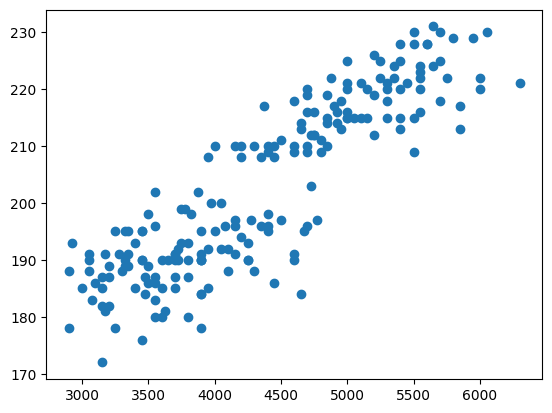

In [167]:
plt.scatter(x_input['body_mass_g'], x_input['flipper_length_mm'])
plt.scatter()

In [218]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['flipper_length_mm', 'body_mass_g', 'species', 'sex']]

In [219]:
peng_data['body_mass_g'] = peng_data.groupby(['species', 'sex'])['body_mass_g'].transform(lambda x: x.fillna(x.mean()))
peng_data['flipper_length_mm'] = peng_data.groupby(['species', 'sex'])['flipper_length_mm'].transform(lambda x: x.fillna(x.mean()))

In [220]:
peng_data.isna().sum()  # NaN이 모두 제거되었는지 확인

flipper_length_mm    0
body_mass_g          0
species              0
sex                  0
dtype: int64

In [221]:
peng_data = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]
peng_target = df.loc[cond, ['species']]

In [225]:
x_input, y_input, x_target, y_target = tts(peng_data, peng_target)
kn.fit(x_input, x_target['species'])

KNeighborsClassifier()

In [237]:
kn.predict([[200, 4400]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

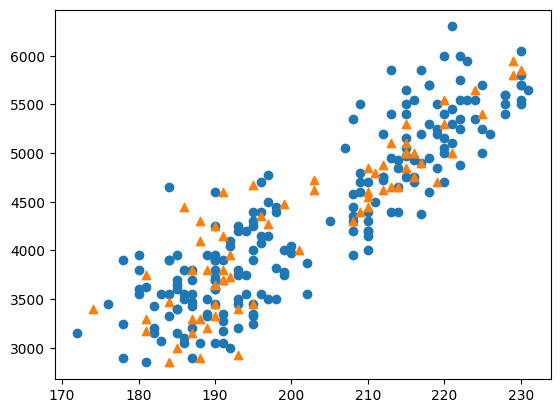

In [238]:
plt.scatter(x_input['flipper_length_mm'], x_input['body_mass_g'])
plt.scatter(y_input['flipper_length_mm'], y_input['body_mass_g'], marker='^')

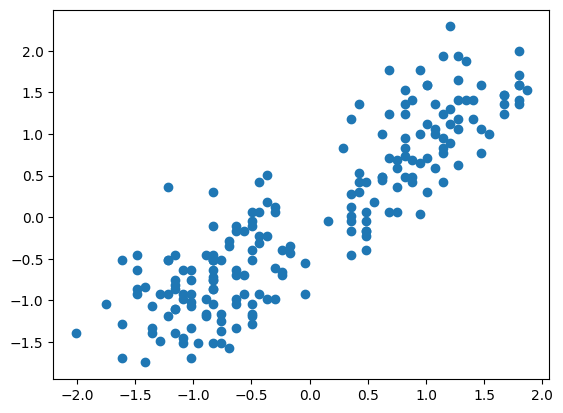

In [240]:
mean = x_input.mean()
std = x_input.std()

x_scaled = (x_input - mean) / std
plt.scatter(x_scaled['flipper_length_mm'], x_scaled['body_mass_g'])